In [129]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

filename ='data/star_classification.csv'
sdss17_df_raw = pd.read_csv(filename)

num_rows = np.shape(sdss17_df_raw)[0]
num_cols = np.shape(sdss17_df_raw)[1]
print(f"DataFrame Initially has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')

print(f"The Cols are:", end="\n\n")
print(sdss17_df_raw.dtypes)

DataFrame Initially has #Cols:100000 and #Rows:18

The Cols are:

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object


In [121]:
sdss17_df = sdss17_df_raw.drop(['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID', 'spec_obj_ID', 'MJD', 'plate'], axis = 1)

In [122]:
# Remove Very Bright Objects
sdss17_df_no_anomaly = sdss17_df[sdss17_df['u'] > -1]

num_rows = np.shape(sdss17_df_no_anomaly)[0]
num_cols = np.shape(sdss17_df_no_anomaly)[1]
print(f"DataFrame now has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')

DataFrame now has #Cols:99999 and #Rows:7



In [123]:
sdss17_features = sdss17_df_no_anomaly.drop('class', axis=1, inplace=False)
sdss17_class_categorical = sdss17_df_no_anomaly['class']
classes = sdss17_class_categorical.unique() # redundant - should be created earlier

print(sdss17_features.columns)
print(sdss17_class_categorical)

Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')
0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 99999, dtype: object


In [124]:
X_train, X_test, y_train, y_test = train_test_split(
    sdss17_features,
    sdss17_class_categorical,
    test_size=0.33,
    random_state=1000)

In [114]:
%%time
from sklearn.ensemble import RandomForestClassifier
#from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=6)
enn = EditedNearestNeighbours()
#smote = SMOTE(random_state=1000)
smote = RandomOverSampler(random_state=1000)
rfc = RandomForestClassifier(n_estimators=1000, max_features='sqrt') # n_estimators=1000, max_features='sqrt'

from imblearn.pipeline import make_pipeline

model = make_pipeline(smote, rfc)

from sklearn.metrics import classification_report

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     19670
         QSO       0.95      0.94      0.95      6200
        STAR       1.00      1.00      1.00      7130

    accuracy                           0.98     33000
   macro avg       0.98      0.97      0.98     33000
weighted avg       0.98      0.98      0.98     33000

CPU times: user 3min 15s, sys: 10.3 ms, total: 3min 15s
Wall time: 3min 15s


Precision for each class [0.98045669 0.95437387 0.99594746]
Recall for each class [0.98449415 0.93790323 0.99957924]
F1 for each class [0.98247127 0.94606687 0.99776004]
Balanced accuracy (av recall): 0.973992207325499


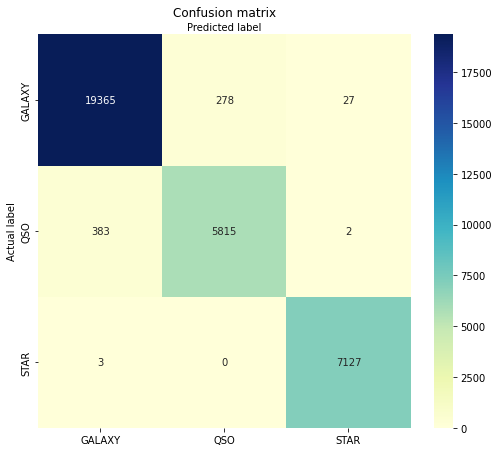

ValueError: multi_class must be in ('ovo', 'ovr')

In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score






#y_score = np.transpose([y_pred[:, 1] for y_pred in rfc.predict_proba(X_train)])
#print(roc_auc_score(y, y_score, average=None))
print("Precision for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[0])
print("Recall for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[1])
print("F1 for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[2])
#print(precision_recall_fscore_support(y_test, y_pred, average='macro')) # straight average of  recall, precision, f1
#print(balanced_accuracy_score(y_test, y_pred))
# (0.9789358893653864, 0.979030303030303, 0.9789676714106779) <- random over sample

from sklearn.metrics import accuracy_score
print("Balanced accuracy (av recall):", balanced_accuracy_score(y_test, y_pred))
# Create a confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)# Y_test

# Create heatmap from the confusion matrix
class_names=['GALAXY', 'QSO', 'STAR'] # name  of classes
fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label'); plt.xlabel('Predicted label')
tick_marks = [0.5, 1.5, 2.5]
plt.yticks(tick_marks, class_names)
plt.xticks(tick_marks, class_names)
plt.savefig('data/rfctune.png')
plt.show()
#print('MCC: ', matthews_corrcoef(y_test, y_pred))


from sklearn.preprocessing import LabelEncoder
y_pred = LabelEncoder().fit_transform(y_pred)
y_pred = y_pred.astype(int)

y_test = LabelEncoder().fit_transform(y_test)
y_test = y_test.astype(int)


print("AUR ROC: ", roc_auc_score(y_test, y_pred, multi_class='ovo'))

In [ ]:
# RANDOM OVERSAMPLE
#Precision for each class [0.98055499 0.95407577 0.99608665]
#Recall for each class [0.98444331 0.93822581 0.99957924]
#F1 for each class [0.98249531 0.94608441 0.99782989]

# SMOTE
# Precision for each class [0.98276477 0.94077047 0.99580947]
# Recall for each class [0.97981698 0.94532258 0.99985975]
# F1 for each class [0.98128866 0.94304103 0.9978305 ]

In [104]:
y_test

array([0, 2, 0, ..., 0, 0, 0])

In [105]:
y_pred

array(['GALAXY', 'STAR', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype=object)

In [130]:
def pipeline_predict(pipeline):
    pipeline: list
    name=pipeline[0]
    model = make_pipeline(*pipeline[1:])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print("Precision for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[0])
    print("Recall for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[1])
    print("F1 for each class", precision_recall_fscore_support(y_test, y_pred, average=None)[2])
    print("Balanced accuracy (av recall):", balanced_accuracy_score(y_test, y_pred))
    
smote = ['SMOTE', SMOTE(random_state=1000), RandomForestClassifier(n_estimators=1000, max_features='sqrt')]
roversample = ['Random Oversampling', RandomOverSampler(random_state=1000), RandomForestClassifier(n_estimators=1000, max_features='sqrt')]
logreg = ['Log Reg', StandardScaler(), LogisticRegression()]

pipelines = [smote, roversample, logreg]

for pipe in pipelines:
    print("------")
    pipeline_predict(pipe)
    print("------\n\n")
    

------
Precision for each class [0.98266191 0.94044944 0.99567039]
Recall for each class [0.97966446 0.945      0.99985975]
F1 for each class [0.9811609  0.94271923 0.99776067]
Balanced accuracy (av recall): 0.974841403731937
------


------
Precision for each class [0.98040407 0.95374016 0.99608665]
Recall for each class [0.98434164 0.93774194 0.99957924]
F1 for each class [0.98236891 0.94567339 0.99782989]
Balanced accuracy (av recall): 0.9738876050437644
------


------
Precision for each class [0.96371686 0.9390411  0.94872819]
Recall for each class [0.96278597 0.88451613 0.99915849]
F1 for each class [0.96325119 0.91096346 0.97329053]
Balanced accuracy (av recall): 0.9488201942618897
------


